In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#Import data from data file and name it math2018

excel_file = 'mathdownload2018.xlsx'
math2018=pd.read_excel(excel_file)

In [3]:
math2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148933 entries, 0 to 148932
Data columns (total 32 columns):
cds                 148933 non-null int64
rtype               148933 non-null object
schoolname          134824 non-null object
districtname        148916 non-null object
countyname          148916 non-null object
charter_flag        15685 non-null object
coe_flag            487 non-null object
dass_flag           7804 non-null object
studentgroup        148933 non-null object
currdenom           148933 non-null int64
currdenom_swd       10205 non-null float64
currstatus          97487 non-null float64
priordenom          148842 non-null float64
priordenom_swd      9952 non-null float64
priorstatus         96934 non-null float64
change              93435 non-null float64
statuslevel         148933 non-null int64
changelevel         148933 non-null int64
color               148933 non-null int64
box                 148933 non-null int64
hscutpoints         25661 non-null object

In [4]:
#check percentage of missing values in each feature
math2018.isnull().sum()/len(math2018)*100

cds                  0.000000
rtype                0.000000
schoolname           9.473387
districtname         0.011415
countyname           0.011415
charter_flag        89.468419
coe_flag            99.673007
dass_flag           94.760060
studentgroup         0.000000
currdenom            0.000000
currdenom_swd       93.147926
currstatus          34.543050
priordenom           0.061101
priordenom_swd      93.317801
priorstatus         34.914357
change              37.263736
statuslevel          0.000000
changelevel          0.000000
color                0.000000
box                  0.000000
hscutpoints         82.770105
curradjustment      94.241035
prioradjustment     93.423217
pairshare_method    99.938899
caa_denom           92.761174
caa_level1_num      99.052594
caa_level1_pct      99.052594
caa_level2_num      99.052594
caa_level2_pct      99.052594
caa_level3_num      99.052594
caa_level3_pct      99.052594
ReportingYear        0.000000
dtype: float64

In [5]:
# saving missing values in a variable
missing_perc = math2018.isnull().sum()/len(math2018)*100

# saving column names in a variable
variables = math2018.columns
variable = []

# setting threshold as 40% to imputing features above it
for i in range (0,32):
    if missing_perc[i]<=40: 
        variable.append(variables[i])

variable

['cds',
 'rtype',
 'schoolname',
 'districtname',
 'countyname',
 'studentgroup',
 'currdenom',
 'currstatus',
 'priordenom',
 'priorstatus',
 'change',
 'statuslevel',
 'changelevel',
 'color',
 'box',
 'ReportingYear']

In [6]:
# manually dropping remaining features that are not signficant: cds, reporting year
del variable[-1]
del variable[0]
variable

['rtype',
 'schoolname',
 'districtname',
 'countyname',
 'studentgroup',
 'currdenom',
 'currstatus',
 'priordenom',
 'priorstatus',
 'change',
 'statuslevel',
 'changelevel',
 'color',
 'box']

In [7]:
# variance of each feature
math2018.var()

cds                1.988583e+26
currdenom          1.524731e+08
currdenom_swd      1.289671e+07
currstatus         4.452180e+03
priordenom         1.542608e+08
priordenom_swd     1.265432e+07
priorstatus        4.235754e+03
change             3.283461e+02
statuslevel        2.391942e+00
changelevel        3.437627e+00
color              2.267563e+00
box                6.855915e+03
curradjustment     6.081766e+00
prioradjustment    5.448329e+00
caa_denom          1.217150e+05
caa_level1_num     3.869390e+05
caa_level1_pct     4.463469e+02
caa_level2_num     7.054336e+04
caa_level2_pct     2.514173e+02
caa_level3_num     5.733553e+03
caa_level3_pct     1.274645e+02
ReportingYear      0.000000e+00
dtype: float64

In [8]:
# subset math2018 by selecting only features of interest (has less than 40% missing values)
math2018_subset = math2018[variable]

In [9]:
# correlation calculation for the remaining features of interest. looking for correlations higher than 0.6.  
# May need to remove one of the highly correlated features.  First remove the dependent variable: currstatus
df = math2018_subset.drop('currstatus', 1)
corr = df.corr()

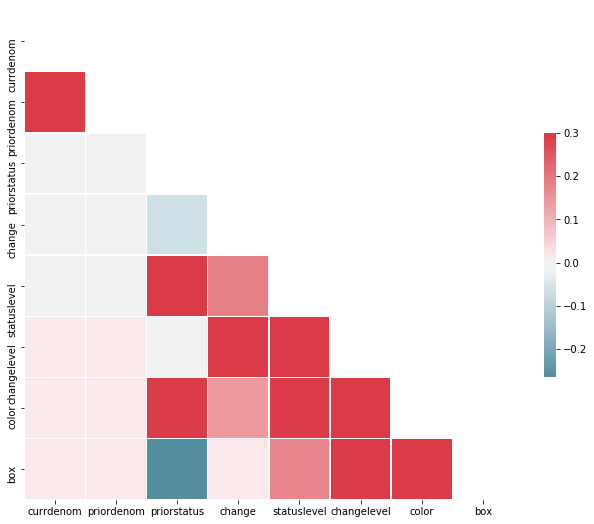

In [11]:
import seaborn as sns
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
# drop priordenom since it's highly correlated to currdenom
df = math2018_subset.drop('priordenom', 1)

In [13]:
# RandomForest.  From the subset of math2018, need to drop any features that is non-numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148933 entries, 0 to 148932
Data columns (total 13 columns):
rtype           148933 non-null object
schoolname      134824 non-null object
districtname    148916 non-null object
countyname      148916 non-null object
studentgroup    148933 non-null object
currdenom       148933 non-null int64
currstatus      97487 non-null float64
priorstatus     96934 non-null float64
change          93435 non-null float64
statuslevel     148933 non-null int64
changelevel     148933 non-null int64
color           148933 non-null int64
box             148933 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 14.8+ MB


In [14]:
# dropping features that are non-numeric
df = df.drop(['rtype', 'schoolname', 'districtname', 'countyname', 'studentgroup'],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148933 entries, 0 to 148932
Data columns (total 8 columns):
currdenom      148933 non-null int64
currstatus     97487 non-null float64
priorstatus    96934 non-null float64
change         93435 non-null float64
statuslevel    148933 non-null int64
changelevel    148933 non-null int64
color          148933 non-null int64
box            148933 non-null int64
dtypes: float64(3), int64(5)
memory usage: 9.1 MB


In [15]:
# dropping rows of currstatus with NA
df = df.dropna(subset=["currstatus"], inplace=True)

df
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df = pd.get_dummies(df)
model.fit(df, math2018_subset.currstatus)